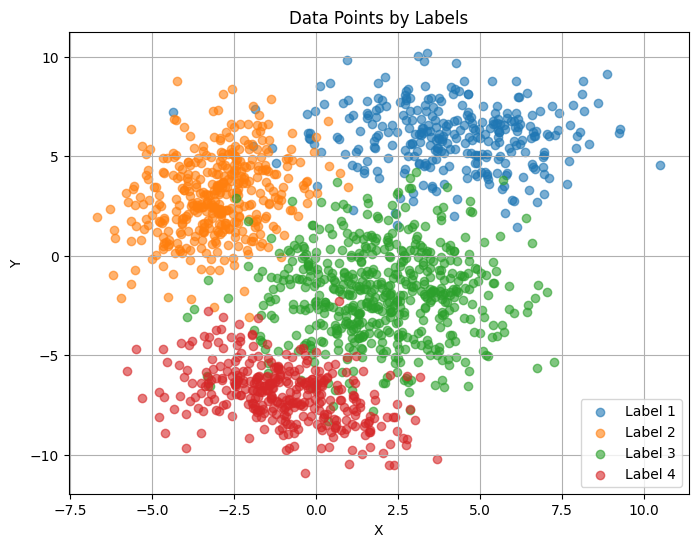

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/HW11-ClusteringData.csv'
data = pd.read_csv(file_path, header=None, names=['x', 'y', 'label'])

# Plot the data points
plt.figure(figsize=(8, 6))
for label in data['label'].unique():
    subset = data[data['label'] == label]
    plt.scatter(subset['x'], subset['y'], label=f'Label {label}', alpha=0.6)

plt.title('Data Points by Labels')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

This is the scatter plot of the data points which are color coded by their true labels.

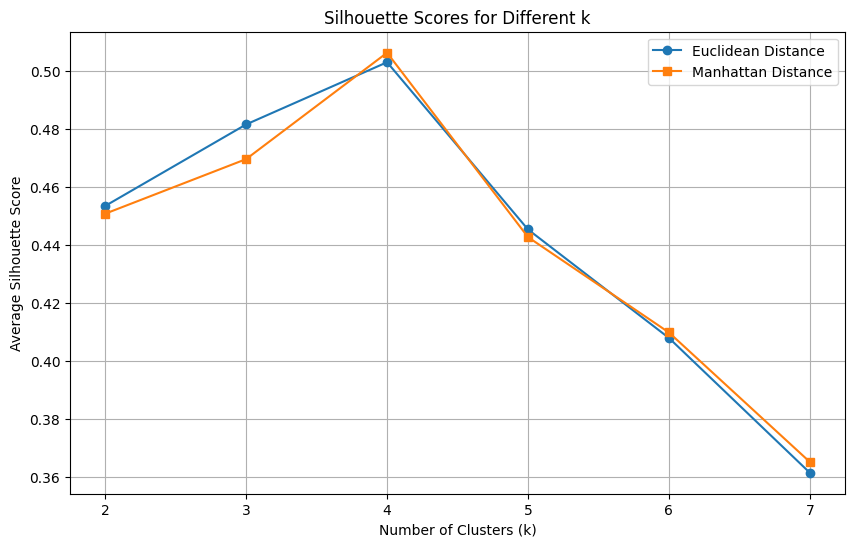

(4, 4)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import numpy as np

# Function to compute silhouette scores with Manhattan distance
def silhouette_score_manhattan(X, labels):
    n_clusters = len(np.unique(labels))
    silhouette_values = []
    for i, x_i in enumerate(X):
        # Compute intra-cluster distance (a(i))
        same_cluster = X[labels == labels[i]]
        a_i = np.mean(cdist([x_i], same_cluster, metric='cityblock')[0])

        # Compute inter-cluster distance (b(i))
        other_clusters = [X[labels == cluster] for cluster in range(n_clusters) if cluster != labels[i]]
        b_i = min(np.mean(cdist([x_i], cluster, metric='cityblock')[0]) for cluster in other_clusters)

        silhouette_values.append((b_i - a_i) / max(a_i, b_i))

    return np.mean(silhouette_values)

# Prepare data for clustering
X = data[['x', 'y']].values

# Initialize lists to store silhouette scores
silhouette_scores_euclidean = []
silhouette_scores_manhattan = []
k_values = range(2, 8)

# Perform k-means clustering for k in {2, 3, ..., 7}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_

    # Calculate silhouette scores
    silhouette_scores_euclidean.append(silhouette_score(X, labels, metric='euclidean'))
    silhouette_scores_manhattan.append(silhouette_score_manhattan(X, labels))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores_euclidean, marker='o', label='Euclidean Distance')
plt.plot(k_values, silhouette_scores_manhattan, marker='s', label='Manhattan Distance')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Identify optimal k values
optimal_k_euclidean = k_values[np.argmax(silhouette_scores_euclidean)]
optimal_k_manhattan = k_values[np.argmax(silhouette_scores_manhattan)]

optimal_k_euclidean, optimal_k_manhattan

The plot above shows the average silhouette scores for k 𝛜 {2, 3,...., 7} using both Euclidean and Manhattan distances. The optimal number of clusters is:-

*   Euclidean Distance: k = 4
*   Manhattan Distance: k = 4



,Component,True Mean X,True Mean Y,Estimated Mean X,Estimated Mean Y,True Weight,Estimated Weight
0,1,4,6,-2.995905,3.012336,0.1875,0.252397
1,2,-3,3,-0.899401,-6.818506,0.2500,0.235710
2,3,2,-2,4.190890,5.900867,0.3438,0.189282
3,4,-1,-7,2.052429,-1.809366,0.2188,0.322611


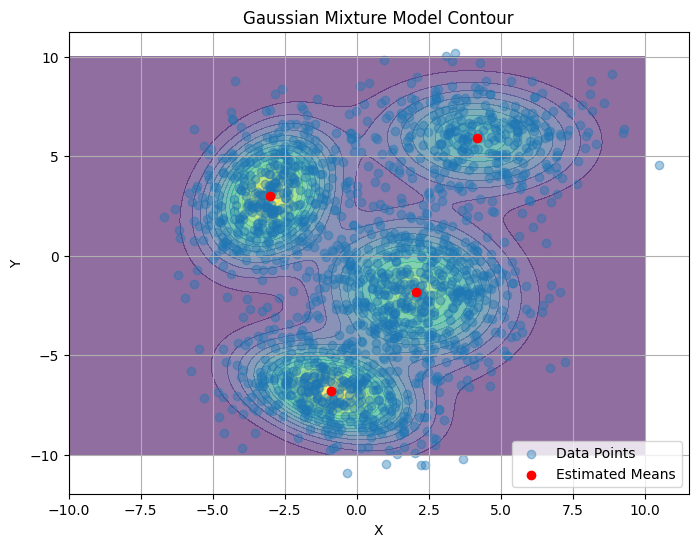

In [ ]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42).fit(X)

# Extract estimated parameters
estimated_means = gmm.means_
estimated_weights = gmm.weights_

# True values for comparison
true_means = np.array([[4, 6], [-3, 3], [2, -2], [-1, -7]])
true_weights = np.array([0.1875, 0.25, 0.3438, 0.2188])

# Organize results for better comparison
results = pd.DataFrame({
    'Component': [1, 2, 3, 4],
    'True Mean X': true_means[:, 0],
    'True Mean Y': true_means[:, 1],
    'Estimated Mean X': estimated_means[:, 0],
    'Estimated Mean Y': estimated_means[:, 1],
    'True Weight': true_weights,
    'Estimated Weight': estimated_weights
})

display(results)

# Plot the estimated GMM
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X_grid, Y_grid = np.meshgrid(x, y)
XY = np.column_stack([X_grid.ravel(), Y_grid.ravel()])
Z = np.exp(gmm.score_samples(XY)).reshape(X_grid.shape)

plt.figure(figsize=(8, 6))
plt.contourf(X_grid, Y_grid, Z, levels=15, cmap='viridis', alpha=0.6)
plt.scatter(data['x'], data['y'], alpha=0.4, label='Data Points')
plt.scatter(estimated_means[:, 0], estimated_means[:, 1], color='red', label='Estimated Means')
plt.title('Gaussian Mixture Model Contour')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Here is a detailed comparison of the true and estimated Gaussian mixture model parameters in a table.

The plot visualizes the Gaussian mixture model contours using the estimated parameters which shows the probability density functin of the mixture model.

The red points mark the estimated means (μk) of the Gaussian components.

The underlying contours illustrate how the data points are distributed and how the Gaussians overlap in the 2D space.